# CS 412 HW 3

---

Ipek Akkus - 30800

28.04.2024



In [29]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# STEP 1
Load the dataset and preprocess the data:

*  Set your random seed to 42.
*  Split the data into training, validation and test sets (60% , 20% , 20% ).
*  As the data ranges vary significantly across the feature dimensions, you should scale your features. Scale them linearly within the 0-1 range. Be careful not to include the test data when scaling. You can use StandartScaler for that.


In [30]:
# Load the dataset
df = pd.read_csv(r"/content/titanicdata.csv")
# Display the first few rows of the dataframe
print(df.head())

   Survived  Pclass  Sex   Age
0         0       3    2  22.0
1         1       1    1  38.0
2         1       3    1  26.0
3         1       1    1  35.0
4         0       3    2  35.0


In [31]:
# Step 1.1: Set the Random Seed
np.random.seed(42)

In [32]:
# Step 1.2: Split the Data
train_val, test = train_test_split(df, test_size=0.2, random_state=42)  # Split into 80% training + validation and 20% test
train, val = train_test_split(train_val, test_size=0.25, random_state=42)  # Split the 80% into 60% training and 20% validation

Scaling Step

MinMaxScalar is used and it transforms each feature x to a given range, usually [0,1], using this formula

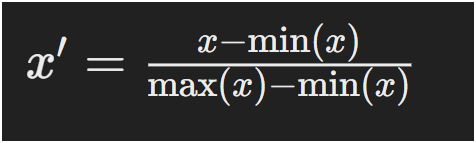


Scaling is applied to the feature columns 'Age', 'Sex', and 'Pclass', but not to the target column 'Survived'.

The scaler is fitted only on the training data to calculate the appropriate scaling parameters (minimum and maximum values of each feature). This ensures that no information from the test or validation data influences the scaling parameters, thereby preventing data leakage.

After fitting, the same scaler is used to transform the training, validation, and test datasets. This means that the validation and test data are scaled using only the parameters derived from the training data, ensuring consistent preprocessing without any bias from unseen data.

In [33]:
# Step 1.3: Scale the Features
features = train.columns.drop('Survived')

scaler = MinMaxScaler()
# Fit the scaler on the training data only
train[features] = scaler.fit_transform(train[features])

# Transform the validation data using the fitted scaler
val[features] = scaler.transform(val[features])

# Transform the test data using the fitted scaler
test[features] = scaler.transform(test[features])

In [34]:
# Separate features and target variable for training, validation, and test sets
# DRopping 'Survived' to get the feature matrices.
X_train = train.drop('Survived', axis=1).values
y_train = train['Survived'].values.reshape(-1, 1)  # reshaping for consistency

X_val = val.drop('Survived', axis=1).values
y_val = val['Survived'].values.reshape(-1, 1)

X_test = test.drop('Survived', axis=1).values
y_test = test['Survived'].values.reshape(-1, 1)

# STEP 2

Implement the logistic regression model


*   Initialize the model parameters w.
*   Implement the sigmoid function, σ(z), where z is the linear combination of the input features and the model parameters w.
*   Implement the cost function.  
*   Implement the gradient descent algorithm to minimize the cost function, updating the parameters as w := w−α∇wJ(w) where α is the learning rate.




In [35]:
#Initialize the model parameters w.
n_features = X_train.shape[1]
w = np.random.rand(n_features, 1) * 0.01
#w = np.zeros((n_features, 1))

Sigmoid Function

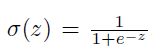


In [36]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Cost Function

image.png

In [37]:
def compute_cost(X, y, w):
    m = X.shape[0]
    h = sigmoid(np.dot(X, w))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

Gradient Descent

image.png

In [38]:
def gradient_descent(X, y, w, learning_rate, num_iterations):
    m = X.shape[0]
    cost_history = []

    for i in range(num_iterations):
        # Prediction
        h = sigmoid(np.dot(X, w))
        # Error
        error = h - y
        # Gradient calculation
        gradient = np.dot(X.T, error) / m
        # Updating weights
        w -= learning_rate * gradient
        # Save the cost for this iteration
        cost = compute_cost(X, y, w)
        cost_history.append(cost)

    return w, cost_history

# STEP 3

Set the step size to 0.1. Train your model using the training data. Calculate the loss on the validation
 data. Plot both the training and validation losses across 100 iterations.

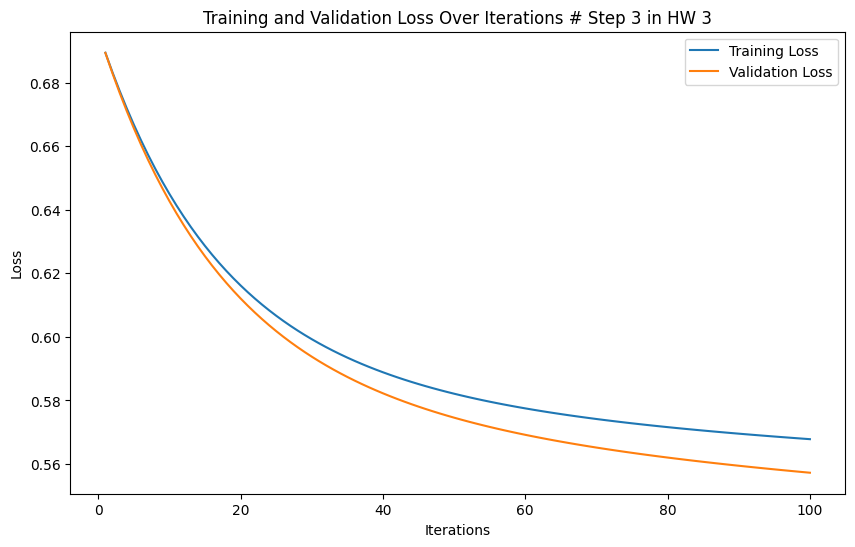

In [39]:
# Gradient Descent Settings
learning_rate = 0.1
iterations = 100

# Train the model and calculate the loss on validation data
training_loss_history = []
validation_loss_history = []

for i in range(iterations):
    w, training_loss = gradient_descent(X_train, y_train, w, learning_rate, 1)  # Perform one iteration of gradient descent
    training_loss_history.append(training_loss)

    validation_loss = compute_cost(X_val, y_val, w)
    validation_loss_history.append(validation_loss)

# Plot the loss over the iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), training_loss_history, label='Training Loss')
plt.plot(range(1, iterations + 1), validation_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss Over Iterations # Step 3 in HW 3')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# STEP 4

Now vary your step size and number of iterations, and calculate the validation loss in each case. Pick the one that gives you the best loss. Plot the loss curve across different iterations for the chosen values of these hyperparameters.

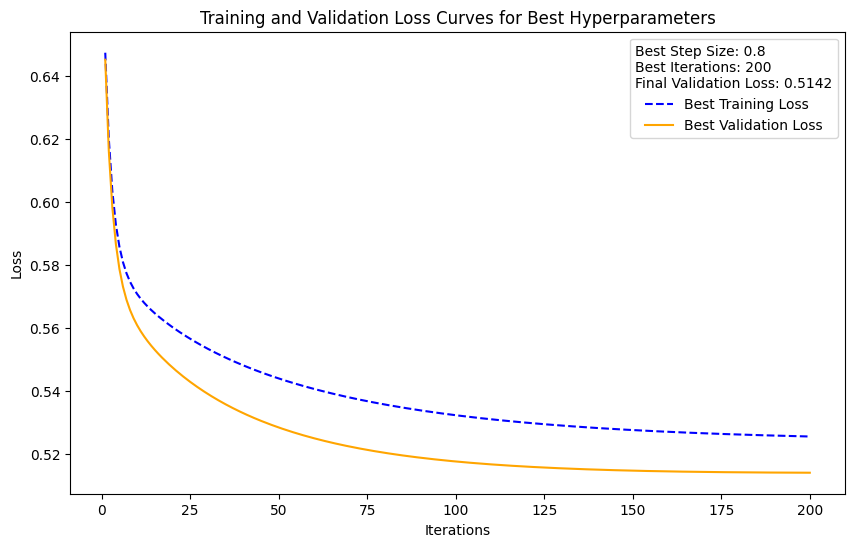

In [40]:
# Define a range of learning rates and iteration counts to try
learning_rates = [0.001, 0.01, 0.1, 0.5, 0.8, 1]
iteration_counts = [50, 100, 200, 500]

# Initialize variables to store the best loss and corresponding hyperparameters
best_loss = float('inf')
best_learning_rate = None
best_iterations = None
best_w = None

# Loop over all combinations of learning rates and iteration counts
for lr in learning_rates:
    for iter_count in iteration_counts:
        # Initialize weights
        w = np.zeros((n_features, 1))

        # Initialize temporary loss history lists
        temp_training_loss_history = []
        temp_validation_loss_history = []

        # Perform gradient descent for the current number of iterations
        for i in range(iter_count):
            w, training_loss = gradient_descent(X_train, y_train, w, lr, 1)
            temp_training_loss_history.append(training_loss)

            validation_loss = compute_cost(X_val, y_val, w)
            temp_validation_loss_history.append(validation_loss)

       # Check if the final validation loss for this combination is the best one
        if temp_validation_loss_history[-1] < best_loss:  # Change to best_loss here
            best_loss = temp_validation_loss_history[-1]
            best_learning_rate = lr
            best_iterations = iter_count
            best_w = w

            # Store the best loss history
            best_training_loss_history = temp_training_loss_history
            best_validation_loss_history = temp_validation_loss_history

# Retrain with the best hyperparameters and plot
w = np.zeros((n_features, 1))  # Reinitialize weights for the final run
_, best_training_loss_history = gradient_descent(X_train, y_train, w, best_learning_rate, best_iterations)

# Plot the loss over the iterations with annotations for hyperparameters and final validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, best_iterations + 1), best_training_loss_history, 'b--', label='Best Training Loss')
plt.plot(range(1, best_iterations + 1), best_validation_loss_history, 'orange', label='Best Validation Loss')

# Add title and labels
plt.title('Training and Validation Loss Curves for Best Hyperparameters')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Create legend and add annotations
plt.legend(title=f"Best Step Size: {best_learning_rate} \nBest Iterations: {best_iterations}\nFinal Validation Loss: {best_loss:.4f}")

# Show the plot
plt.show()

# STEP 5

Combine the validation and training data and retrain the final model with the chosen hyperparameters.


In [41]:
# Combine the validation and training sets
X_combined = np.vstack((X_train, X_val))
y_combined = np.vstack((y_train, y_val))

# Reinitialize the weights for the final model training
w_final = np.zeros((n_features, 1))

# Retrain the model with the combined dataset using the best hyperparameters
w_final, _ = gradient_descent(X_combined, y_combined, w_final, best_learning_rate, best_iterations)

# STEP 6

 Evaluate the accuracy of your model on the testing data and report the results.

In [42]:
def predict(X, w):
    """Make predictions using logistic regression parameters"""
    z = np.dot(X, w)
    return sigmoid(z) >= 0.5  # returns a boolean array where True is 1 and False is 0

# Make predictions on the test set
y_pred = predict(X_test, w_final)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)  # Since True is 1 and False is 0, this works as intended

print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


Accuracy on the test set: 75.98%
